do something...
我想搜搜看最後的N天內各種商品售出情形(訂單完成)

In [1]:
# NOT WORK
#coding:utf-8
#import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = ["sans-serif"]
#plt.rcParams['font.sans-serif']=['Microsoft YaHei', 'Bitstream Vera Sans', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'
# This block is quoted from https://www.zhihu.com/question/25404709
# Workaround for displaying Chinese characters in plot function.


In [2]:
# init
import pandas as pd
import gc
df = pd.read_csv('Ntu_Orders.csv')
gc.collect()

7

In [3]:
#day = int(input('要找最近幾天內的?'))
day = 30

In [4]:
df['DateIdRaw'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d') # Convert date string to machine-friendly string.

In [5]:
# Sort data by date 
df = df.sort_values(by='DateIdRaw') #HINT: df.sort_values is not an in-place operation.
# gc.collect()

In [6]:
# Reset index by new order (??? 
df['Index'] = range(0, df.shape[0]) 
df = df.set_index('Index') # HINT: df.set_index is not an in-place operation.

In [7]:
day_start = df.loc[df.shape[0]-1, 'DateIdRaw'] - pd.DateOffset(day - 1) # get start date
day_start

Timestamp('2017-12-11 00:00:00')

In [8]:
target = df[(df['DateIdRaw'] >= day_start) & (df['SalesOrderSlaveStatusDef'] == 'Finish')] # get our target ...


In [9]:
byCol = 'LevelFourCategoryName'
data = target.groupby(by=byCol)['Quantity'].sum()
data

LevelFourCategoryName
T恤/帽T         18519
三角褲             273
休閒短裙/褲         2304
休閒長裙/褲         4550
內搭褲            5960
其他              748
單寧短裙/褲          121
單寧長裙/褲         3938
圍巾             3573
女性襪類           3365
平口褲              17
成套衣褲組          2077
披肩              292
日系蕾絲內衣           13
水鑽美背內衣           52
洋裝            10954
無鋼圈運動BRA         68
皮衣/風衣/大衣       1037
罩衫/針織/造型外套     1191
背心/小可愛         2875
舒適無痕內衣           61
襯衫              967
西裝外套             68
連帽/棉外套         1349
連身裙/褲           823
針織衫           12670
集中包覆內衣           53
雪紡/棉麻衫          504
高領衫/毛衣         2138
Name: Quantity, dtype: int64

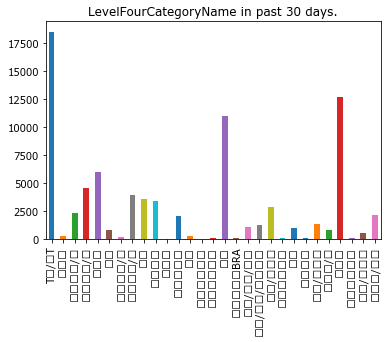

['T恤/帽T',
 '三角褲',
 '休閒短裙/褲',
 '休閒長裙/褲',
 '內搭褲',
 '其他',
 '單寧短裙/褲',
 '單寧長裙/褲',
 '圍巾',
 '女性襪類',
 '平口褲',
 '成套衣褲組',
 '披肩',
 '日系蕾絲內衣',
 '水鑽美背內衣',
 '洋裝',
 '無鋼圈運動BRA',
 '皮衣/風衣/大衣',
 '罩衫/針織/造型外套',
 '背心/小可愛',
 '舒適無痕內衣',
 '襯衫',
 '西裝外套',
 '連帽/棉外套',
 '連身裙/褲',
 '針織衫',
 '集中包覆內衣',
 '雪紡/棉麻衫',
 '高領衫/毛衣']

In [10]:
ax = data.plot(kind='bar', title=byCol + ' in past %d days.'%(day))
ax.set_xlabel("",fontname="MS Gothic UI")
plt.show() # Display plotted under console.
# TODO: 中文亂碼
list(data.index)